In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1.创造对象
Series 是一个值的序列，它只有一个列，以及索引。下面的例子中，就用默认的整数索引

In [6]:
s=pd.Series([1,3,4,np.nan,6,8])
print(s)

0    1.0
1    3.0
2    4.0
3    NaN
4    6.0
5    8.0
dtype: float64


DataFrame 是有多个列的数据表，每个列拥有一个 label，当然，DataFrame 也有索引

In [7]:
dates=pd.date_range('20130101',periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
df=pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.663818,0.905869,-0.565043,0.487891
2013-01-02,1.093587,-1.098543,-0.096573,-0.603740
2013-01-03,-0.006159,2.032085,-0.167738,-0.112772
2013-01-04,0.434666,-0.872198,0.857138,-1.744206
2013-01-05,-1.311733,-0.284723,-1.019039,-0.376488
2013-01-06,-0.632534,-1.097279,0.066356,-0.887849


如果参数是一个 dict，每个 dict 的 value 会被转化成一个 Series

In [10]:
df2=pd.DataFrame({
    'A':1.,
    'B':pd.Timestamp('20130102'),
    'C':pd.Series(1,index=list(range(4)),dtype='float32'),
    'D':np.array([3]*4,dtype='int32'),
    'E':pd.Categorical(["test","train","test","train"]),
    'F':'foo'
})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


每列的格式用 dtypes 查看

In [11]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

你可以认为，DataFrame 是由 Series 组成的

In [12]:
df2.A

0    1.0
1    1.0
2    1.0
3    1.0
Name: A, dtype: float64

# 2.查看数据
用 head 和 tail 查看顶端和底端的几列

In [13]:
df.head()

,A,B,C,D
2013-01-01,-0.663818,0.905869,-0.565043,0.487891
2013-01-02,1.093587,-1.098543,-0.096573,-0.603740
2013-01-03,-0.006159,2.032085,-0.167738,-0.112772
2013-01-04,0.434666,-0.872198,0.857138,-1.744206
2013-01-05,-1.311733,-0.284723,-1.019039,-0.376488


In [14]:
df.tail(3)

,A,B,C,D
2013-01-04,0.434666,-0.872198,0.857138,-1.744206
2013-01-05,-1.311733,-0.284723,-1.019039,-0.376488
2013-01-06,-0.632534,-1.097279,0.066356,-0.887849


实际上，DataFrame 内部用 numpy 格式存储数据。你也可以单独查看 index 和 columns

In [15]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df.values

array([[-0.66381812,  0.90586935, -0.56504285,  0.48789092],
       [ 1.09358676, -1.09854348, -0.09657328, -0.60373956],
       [-0.00615852,  2.03208459, -0.16773787, -0.11277159],
       [ 0.43466646, -0.87219771,  0.85713842, -1.74420594],
       [-1.31173284, -0.28472339, -1.01903946, -0.37648826],
       [-0.63253365, -1.09727943,  0.06635634, -0.88784919]])

describe() 显示数据的概要。

In [18]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.180998,-0.069132,-0.154150,-0.539527
std,0.865995,1.278586,0.631141,0.753789
min,-1.311733,-1.098543,-1.019039,-1.744206
25%,-0.655997,-1.041009,-0.465717,-0.816822
50%,-0.319346,-0.578461,-0.132156,-0.490114
75%,0.324460,0.608221,0.025624,-0.178701
max,1.093587,2.032085,0.857138,0.487891


和 numpy 一样，可以方便的得到转置

In [19]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.663818,1.093587,-0.006159,0.434666,-1.311733,-0.632534
B,0.905869,-1.098543,2.032085,-0.872198,-0.284723,-1.097279
C,-0.565043,-0.096573,-0.167738,0.857138,-1.019039,0.066356
D,0.487891,-0.603740,-0.112772,-1.744206,-0.376488,-0.887849


对 axis 按照 index 排序（axis=1 是指第二个维度，即：列）

In [24]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2013-01-01,0.487891,-0.565043,0.905869,-0.663818
2013-01-02,-0.603740,-0.096573,-1.098543,1.093587
2013-01-03,-0.112772,-0.167738,2.032085,-0.006159
2013-01-04,-1.744206,0.857138,-0.872198,0.434666
2013-01-05,-0.376488,-1.019039,-0.284723,-1.311733
2013-01-06,-0.887849,0.066356,-1.097279,-0.632534


按值排序

In [25]:
df.sort_values(by="B")

,A,B,C,D
2013-01-02,1.093587,-1.098543,-0.096573,-0.603740
2013-01-06,-0.632534,-1.097279,0.066356,-0.887849
2013-01-04,0.434666,-0.872198,0.857138,-1.744206
2013-01-05,-1.311733,-0.284723,-1.019039,-0.376488
2013-01-01,-0.663818,0.905869,-0.565043,0.487891
2013-01-03,-0.006159,2.032085,-0.167738,-0.112772


# 3,选择
注意，以下这些对交互式环境很友好，但是作为 production code 请用优化过的` .at`, `.iat`, `.loc`, `.iloc` 和 `.ix`

## 3.1 获取行/列
从 DataFrame 选择一个列，就得到了 Series

In [26]:
df['A']

2013-01-01   -0.663818
2013-01-02    1.093587
2013-01-03   -0.006159
2013-01-04    0.434666
2013-01-05   -1.311733
2013-01-06   -0.632534
Freq: D, Name: A, dtype: float64

和 numpy 类似，这里也能用 []

In [27]:
df[0:3]

,A,B,C,D
2013-01-01,-0.663818,0.905869,-0.565043,0.487891
2013-01-02,1.093587,-1.098543,-0.096573,-0.603740
2013-01-03,-0.006159,2.032085,-0.167738,-0.112772


## 3.2 通过 label 选择
刚刚那个 DataFrame 可以通过时间戳的下标（`dates[0] = Timestamp('20130101')`）来访问

In [28]:
df.loc[dates[0]]

A   -0.663818
B    0.905869
C   -0.565043
D    0.487891
Name: 2013-01-01 00:00:00, dtype: float64

还可以多选

In [29]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.663818,0.905869
2013-01-02,1.093587,-1.098543
2013-01-03,-0.006159,2.032085
2013-01-04,0.434666,-0.872198
2013-01-05,-1.311733,-0.284723
2013-01-06,-0.632534,-1.097279


注意那个冒号，用法和 MATLAB 或 NumPy 是一样的！所以也可以这样

In [30]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,1.093587,-1.098543
2013-01-03,-0.006159,2.032085
2013-01-04,0.434666,-0.872198


依旧和 MATLAB 一样，当有一个维度是标量（而不是范围或序列）的时候，选择出的矩阵维度会减少

In [31]:
df.loc['20130102',['A','B']]

A    1.093587
B   -1.098543
Name: 2013-01-02 00:00:00, dtype: float64

如果对所有的维度都写了标量，不就是选出一个元素吗？

In [32]:
df.loc[dates[0],'A']

-0.66381812175482136

In [34]:
df.at[dates[0],'A']

-0.66381812175482136

## 3.3通过整数下标选择
和 MATLAB 完全一样,这个就和数组类似啦，直接看例子。选出第3行:

In [35]:
df.iloc[3]

A    0.434666
B   -0.872198
C    0.857138
D   -1.744206
Name: 2013-01-04 00:00:00, dtype: float64

选出3~4行，0~1列：

In [36]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.434666,-0.872198
2013-01-05,-1.311733,-0.284723


也能用 list 选择

In [37]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,1.093587,-0.096573
2013-01-03,-0.006159,-0.167738
2013-01-05,-1.311733,-1.019039


也能用 slice

In [38]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,1.093587,-1.098543,-0.096573,-0.603740
2013-01-03,-0.006159,2.032085,-0.167738,-0.112772


In [39]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.905869,-0.565043
2013-01-02,-1.098543,-0.096573
2013-01-03,2.032085,-0.167738
2013-01-04,-0.872198,0.857138
2013-01-05,-0.284723,-1.019039
2013-01-06,-1.097279,0.066356


对应单个元素

In [40]:
df.iloc[1,1]

-1.0985434827445868

In [41]:
df.iat[1,1]

-1.0985434827445868


# 4.布尔值下标
## 4.1基本用法

In [44]:
df[df.A>0]

,A,B,C,D
2013-01-02,1.093587,-1.098543,-0.096573,-0.603740
2013-01-04,0.434666,-0.872198,0.857138,-1.744206


没有填充的值等于 NaN

In [45]:
df[df>0]

,A,B,C,D
2013-01-01,NaN,0.905869,NaN,0.487891
2013-01-02,1.093587,NaN,NaN,NaN
2013-01-03,NaN,2.032085,NaN,NaN
2013-01-04,0.434666,NaN,0.857138,NaN
2013-01-05,NaN,NaN,NaN,NaN
2013-01-06,NaN,NaN,0.066356,NaN


`isin()` 函数：是否在集合中

In [46]:
df2=df.copy()
df2['E']=['one','one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,-0.663818,0.905869,-0.565043,0.487891,one
2013-01-02,1.093587,-1.098543,-0.096573,-0.603740,one
2013-01-03,-0.006159,2.032085,-0.167738,-0.112772,two
2013-01-04,0.434666,-0.872198,0.857138,-1.744206,three
2013-01-05,-1.311733,-0.284723,-1.019039,-0.376488,four
2013-01-06,-0.632534,-1.097279,0.066356,-0.887849,three


In [48]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-0.006159,2.032085,-0.167738,-0.112772,two
2013-01-05,-1.311733,-0.284723,-1.019039,-0.376488,four


## 4.2 Setting
为 DataFrame 增加新的列，按 index 对应

In [51]:
s1=pd.Series([1,2,3,4,5,6],index=pd.date_range('20130102',periods=6))
s1
df['F']=s1

通过 label 设置

In [52]:
df.at[dates[0],'A']=0

通过下标设置

In [53]:
df.iat[0,1] = 0

用 numpy 数组设置

In [54]:
df.loc[:,'D'] = np.array([5] * len(df))

用布尔值作下标的 set`df2[df2 > 0] =- df2`

## 4.3 缺失值
pandas 用 `np.nan` 表示缺失值。通常它不会被计算。
Reindexing 允许你改变某个轴的 index（以下代码制造一个示例用的 DataFrame）

In [67]:
df1=df.reindex(index=dates[0:4],columns=(df.columns)+['E'])

In [63]:
df1.loc[dates[0]:dates[1],'E']=1
df1

,AE,BE,CE,DE,FE,E
2013-01-01,NaN,NaN,NaN,NaN,NaN,1.0
2013-01-02,NaN,NaN,NaN,NaN,NaN,1.0
2013-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN


丢弃有 NaN 的行

In [64]:
df1.dropna()

,AE,BE,CE,DE,FE,E


填充缺失值

In [65]:
df1.fillna(value=5)

,AE,BE,CE,DE,FE,E
2013-01-01,5.0,5.0,5.0,5.0,5.0,1.0
2013-01-02,5.0,5.0,5.0,5.0,5.0,1.0
2013-01-03,5.0,5.0,5.0,5.0,5.0,5.0
2013-01-04,5.0,5.0,5.0,5.0,5.0,5.0


获取布尔值的 mask：哪些值是 NaN

In [66]:
pd.isnull(df1)

,AE,BE,CE,DE,FE,E
2013-01-01,True,True,True,True,True,False
2013-01-02,True,True,True,True,True,False
2013-01-03,True,True,True,True,True,True
2013-01-04,True,True,True,True,True,True


# 5.操作
通常，操作都会把 NaN 排除在外
## 5.1 平均值

In [69]:
df.mean()

A   -0.070362
B   -0.220110
C   -0.154150
D    5.000000
F    3.000000
dtype: float64

对另一个维度做平均值，只要加个参数

In [70]:
df.mean(1)

2013-01-01    1.108739
2013-01-02    1.179694
2013-01-03    1.771638
2013-01-04    1.683921
2013-01-05    1.276901
2013-01-06    1.667309
Freq: D, dtype: float64

## 5.2 Apply
对数据（行或列） Apply 函数

In [72]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.565043,5,NaN
2013-01-02,1.093587,-1.098543,-0.661616,10,1.0
2013-01-03,1.087428,0.933541,-0.829354,15,3.0
2013-01-04,1.522095,0.061343,0.027784,20,6.0
2013-01-05,0.210362,-0.223380,-0.991255,25,10.0
2013-01-06,-0.422172,-1.320659,-0.924899,30,15.0


In [76]:
df.apply(lambda x:x.max()-x.min())

A    2.405320
B    3.130628
C    1.876178
D    0.000000
F    4.000000
dtype: float64

## 5.3 直方图

In [78]:
s=pd.Series(np.random.randint(0,7,size=10))
s

0    5
1    4
2    3
3    0
4    5
5    3
6    3
7    5
8    0
9    2
dtype: int32

In [79]:
s.value_counts()

5    3
3    3
0    2
4    1
2    1
dtype: int64

## 5.4字符串
Series 自带了很多字符串处理函数，在 str 属性中，下面是一个例子

In [81]:
s=pd.Series(['A','B','C','Aaba','Baca',np.nan,'CABA','dog','cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 5.5 Merge
### 5.5.1 Concat简单地按行拼接

In [83]:
df=pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,-0.745421,1.851195,-1.967342,-0.351883
1,0.786659,-1.014259,0.076794,0.960115
2,-0.384465,0.214179,-0.565465,-0.081570
3,1.017681,0.977365,-0.368323,1.006412
4,0.213647,1.128712,0.252628,0.009161
5,0.552610,-1.049116,0.858358,-0.433842
6,1.094891,-1.823498,0.292392,-0.443611
7,-1.273711,-0.567912,-1.690970,0.033157
8,0.586778,0.796053,0.658008,1.319456
9,-0.776726,-0.136547,-0.266473,-0.974210


In [84]:
# break it into pieces
pieces=[df[3:7],df[:3],df[7:1]]
pd.concat(pieces)

,0,1,2,3
3,1.017681,0.977365,-0.368323,1.006412
4,0.213647,1.128712,0.252628,0.009161
5,0.552610,-1.049116,0.858358,-0.433842
6,1.094891,-1.823498,0.292392,-0.443611
0,-0.745421,1.851195,-1.967342,-0.351883
1,0.786659,-1.014259,0.076794,0.960115
2,-0.384465,0.214179,-0.565465,-0.081570


### 5.5.2 Join
和 SQL 的 join 是一个意思

In [86]:
left=pd.DataFrame({'key':['foo','foo'],'lval':[1,2]})
right=pd.DataFrame({'key':['foo','foo'],'rval':[4,5]})
left

,key,lval
0,foo,1
1,foo,2


In [87]:
right

,key,rval
0,foo,4
1,foo,5


In [88]:
pd.merge(left,right,on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### 5.5.3Append
向 DataFrame 增加新的数据行

In [90]:
df=pd.DataFrame(np.random.randn(8,4),columns=['A','B','C','D'])
df

,A,B,C,D
0,-0.483525,0.164166,0.215916,1.555684
1,0.385667,2.584922,0.090628,-1.573168
2,-1.164983,-1.410978,-0.289409,0.885473
3,-1.392352,-0.395960,1.300486,0.447727
4,-0.434543,-0.964166,0.716641,1.025905
5,1.236784,0.820220,1.496154,-0.571233
6,-1.394953,-1.202754,0.320137,-0.702371
7,1.021139,0.707976,-0.084750,-0.161894


In [91]:
df.iloc[3]

A   -1.392352
B   -0.395960
C    1.300486
D    0.447727
Name: 3, dtype: float64

In [92]:
df.append(s,ignore_index=True)

,A,B,C,D,0,1,2,3,4,5,6,7,8
0,-0.483525,0.164166,0.215916,1.555684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.385667,2.584922,0.090628,-1.573168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1.164983,-1.410978,-0.289409,0.885473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-1.392352,-0.395960,1.300486,0.447727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.434543,-0.964166,0.716641,1.025905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.236784,0.820220,1.496154,-0.571233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-1.394953,-1.202754,0.320137,-0.702371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.021139,0.707976,-0.084750,-0.161894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,A,B,C,Aaba,Baca,NaN,CABA,dog,cat


## 5.6 Grouping
和 SQL 中的 GROUP BY 类似，包括以下这几步：

* 根据某些规则，把数据分组
* 对每组应用一个聚集函数，把结果放在一个数据结构中
准备一下测试用的数据集

In [95]:
df=pd.DataFrame({'A':['foo', 'bar', 'foo', 'bar','foo', 'bar', 'foo', 'foo'],
                 'B':['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                 'C':np.random.randn(8),
                 'D':np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.044309,0.579339
1,bar,one,0.049264,-1.826904
2,foo,two,0.127683,0.591774
3,bar,three,-0.234184,-2.386894
4,foo,two,0.535958,0.121470
5,bar,two,-0.869035,1.312493
6,foo,one,0.368299,-0.658400
7,foo,three,0.602713,0.502885


做 Group 操作并对每组求和

In [96]:
df.groupby('A').sum()

,C,D
A,,
bar,-1.053954,-2.901305
foo,1.678961,1.137066


可以对两列进行 Group by 并求和

In [97]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.049264 -1.826904
    three -0.234184 -2.386894
    two   -0.869035  1.312493
foo one    0.412608 -0.079062
    three  0.602713  0.502885
    two    0.663641  0.713243


## 5.7 Reshape
### 5.7.1 Stack 层叠
准备一下数据

In [1]:
tuples=list(zip(* [['bar','bar','baz','baz','foo','foo','qux','qux'],
                  ['one','two','one','two','one','two','one','two']]))

In [7]:
index=pd.MultiIndex.from_tuples(tuples,names=['first','second'])

In [8]:
df=pd.DataFrame(np.random.randn(8,2),index=index,columns=['A','B'])
df2=df[:4]
df2

A         B
first second                    
bar   one     0.013575 -0.074165
      two    -1.137100 -0.835345
baz   one    -0.362577 -0.348068
      two    -0.832702 -0.170526

`stack()` 把 DataFrame 的列“压缩”到 index 里去

In [9]:
stacked=df2.stack()
stacked

first  second   
bar    one     A    0.013575
               B   -0.074165
       two     A   -1.137100
               B   -0.835345
baz    one     A   -0.362577
               B   -0.348068
       two     A   -0.832702
               B   -0.170526
dtype: float64

反之，只要是 MultiIndex 都可以用 unstack() 恢复出列，默认把最后一个 index 解开

In [10]:
stacked.unstack()

A         B
first second                    
bar   one     0.013575 -0.074165
      two    -1.137100 -0.835345
baz   one    -0.362577 -0.348068
      two    -0.832702 -0.170526

In [11]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.013575 -1.137100
      B -0.074165 -0.835345
baz   A -0.362577 -0.832702
      B -0.348068 -0.170526

In [12]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.013575 -0.362577
       B -0.074165 -0.348068
two    A -1.137100 -0.832702
       B -0.835345 -0.170526

## 6.Pivot Table 旋转
### 6.1 准备一下数据

In [21]:
df=pd.DataFrame({'A':['one','one','two','three']*3,
                'B':['A','B','C']*4,
               'C':['foo','foo','foo','bar','bar','bar']*2,
               'D':np.random.randn(12),
               'E':np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.813597,-1.547496
1,one,B,foo,-2.464506,-0.318286
2,two,C,foo,0.341659,-1.623630
3,three,A,bar,0.179772,-0.803363
4,one,B,bar,-0.313231,0.428538
5,one,C,bar,0.799365,-1.932058
6,two,A,foo,-1.415078,-0.173676
7,three,B,foo,-0.180760,-0.228242
8,one,C,foo,1.035827,0.103486
9,one,A,bar,1.009622,-0.469563


pivot 是把原来的数据(values)作为新表的行(index)、列(columns)

In [22]:
pd.pivot_table(df,values='D',index=['A','B'],columns=['C'])

C             bar       foo
A     B                    
one   A  1.009622 -0.813597
      B -0.313231 -2.464506
      C  0.799365  1.035827
three A  0.179772       NaN
      B       NaN -0.180760
      C  0.493088       NaN
two   A       NaN -1.415078
      B  0.653021       NaN
      C       NaN  0.341659


# 7.时间序列
pandas 的时间序列功能在金融应用中很有用。resample 功能：

In [24]:
rng=pd.date_range('1/1/2012',periods=100,freq='S')

In [25]:
ts=pd.Series(np.random.randint(0,500,len(rng)),index=rng)

In [26]:
ts.resample('T',how='sum')

/root/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':


2012-01-01 00:00:00    15300
2012-01-01 00:01:00    10053
Freq: T, dtype: int64

时区表示

In [28]:
df=pd.DataFrame({'id':[1,2,3,4,5,6],'raw_grade':['a','b','b','a','a','e']})

把上述的文本类型的 raw_grade 转化成类别：

In [29]:
df['grade']=df['raw_grade'].astype('category')
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

类别可以 inplace 地赋值：（只是改一下对应的字符串嘛，类别是用 Index 对象存储的）

In [30]:
df['grade'].cat.categories=["very good","good","very bad"]

修改类别时，如果有新的类别，会自动加进去

In [31]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [32]:
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

做 group by 的时候，空的类别也会被呈现出来

In [33]:
df.groupby('grade').size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

对于 DataFrame，可以直接 plot

In [38]:
df=pd.DataFrame(np.random.randn(100,4),index=ts.index,columns=['A','B','C','D'])

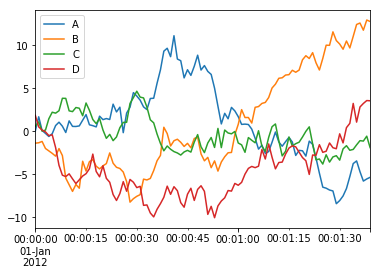

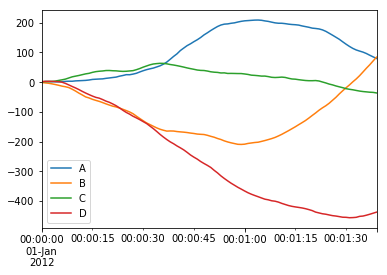

In [40]:
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')
plt.show()